In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
# Reload the dataset
file_path = "Met_Estacao_Darro_2024.csv"
met_data_ED = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

# Select relevant columns
selected_columns = ['year', 'Month', 'Day', 'hr', 'Temp ©', 'RH', 'windDir', 'windSpd', 'precip (mm)', 'press', 'rad']
selected_data = met_data_ED[selected_columns].copy()

# Rename columns for clarity
selected_data.rename(columns={
    'year': 'Year',
    'Month': 'Month',
    'Day': 'Day',
    'hr': 'Hour',
    'Temp ©': 'Temperature (°C)',
    'RH': 'Relative Humidity (%)',
    'windDir': 'Wind Direction',
    'windSpd': 'Wind Speed',
    'precip (mm)': 'Precipitation (mm)',
    'press': 'Pressure',
    'rad': 'Radiation'
}, inplace=True)

# Combine Year, Month, and Day into a single datetime index
selected_data['Datetime'] = pd.to_datetime(selected_data[['Year', 'Month', 'Day']])

# Set as index
selected_data.set_index('Datetime', inplace=True)

# Select odd and even rows separately
odd_rows = selected_data.iloc[1::2].copy()  # Select every odd row (1st index onward, step 2)
even_rows = selected_data.iloc[0::2].copy()  # Select every even row (0th index onward, step 2)

# Drop Year, Month, and Day columns
odd_rows.drop(columns=['Year', 'Month', 'Day'], inplace=True)
even_rows.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Check actual column names
odd_columns = list(odd_rows.columns) #Estacao
even_columns = list(even_rows.columns) #Darro

print('odd dataframe (count nans):')
print(odd_rows.isna().sum())
print('even dataframe (count nans):')
print(even_rows.isna().sum())

odd dataframe (count nans):
Hour                     50024
Temperature (°C)         20308
Relative Humidity (%)    20566
Wind Direction               0
Wind Speed                   0
Precipitation (mm)           0
Pressure                     0
Radiation                50024
dtype: int64
even dataframe (count nans):
Hour                     50024
Temperature (°C)         20317
Relative Humidity (%)    20576
Wind Direction               0
Wind Speed                   0
Precipitation (mm)           0
Pressure                     0
Radiation                50024
dtype: int64


odd dataframe:
Hour                     50024
Temperature (°C)         20308
Relative Humidity (%)    20566
Wind Direction               0
Wind Speed                   0
Precipitation (mm)           0
Pressure                     0
Radiation                50024
dtype: int64
even dataframe:
Hour                     50024
Temperature (°C)         20317
Relative Humidity (%)    20576
Wind Direction               0
Wind Speed                   0
Precipitation (mm)           0
Pressure                     0
Radiation                50024
dtype: int64


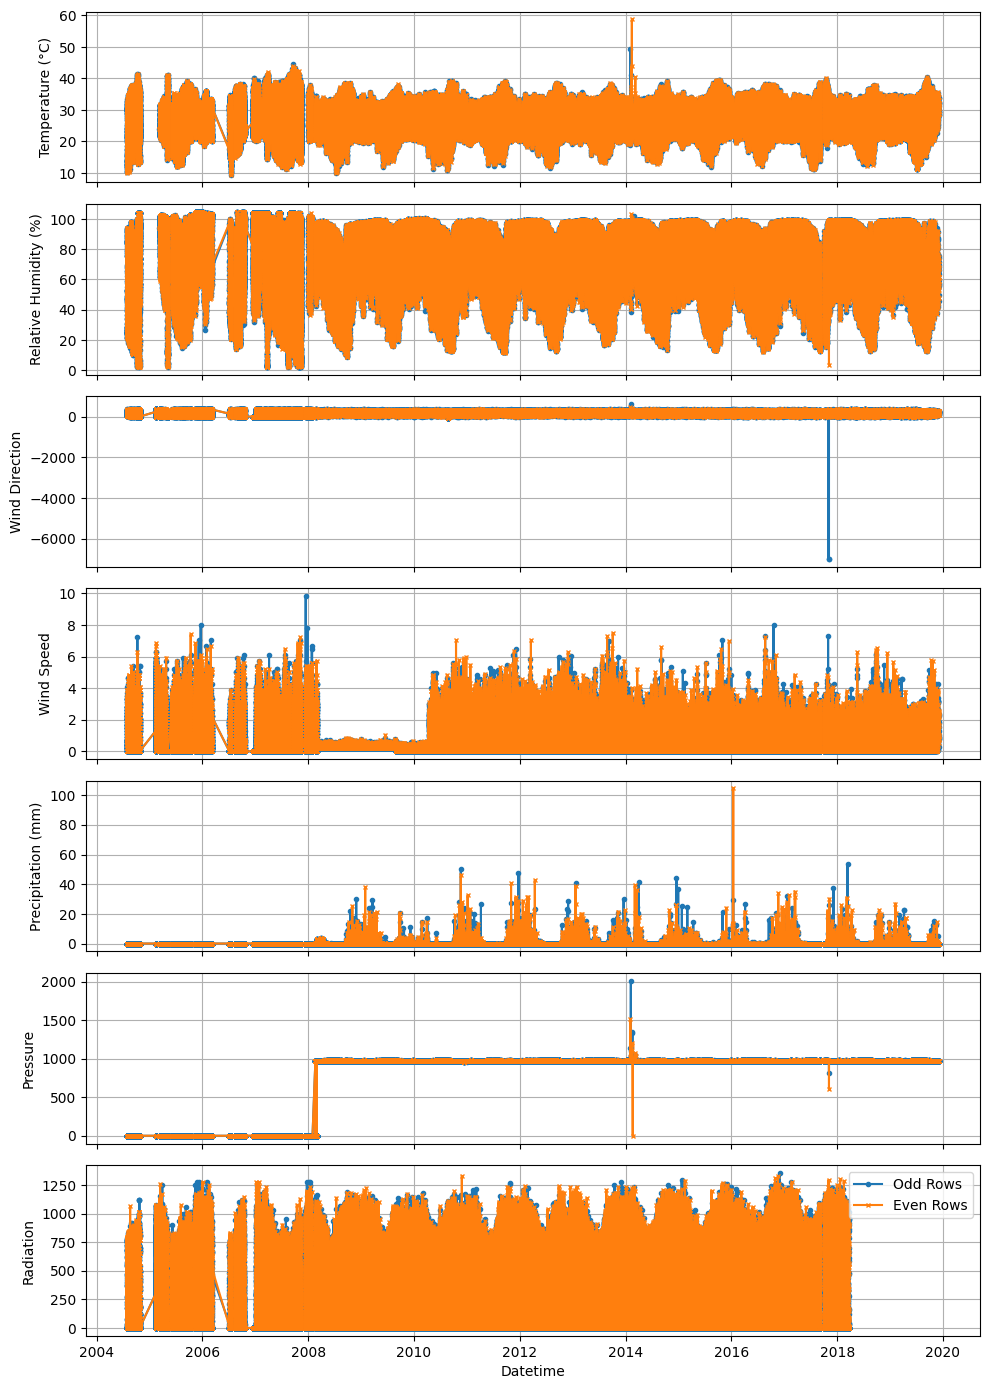

In [21]:
# Define columns to plot
columns_to_plot = ['Temperature (°C)', 'Relative Humidity (%)', 'Wind Direction',
                   'Wind Speed', 'Precipitation (mm)', 'Pressure', 'Radiation']

# Create subplots
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 14), sharex=True)

# Plot each variable as a subplot
for ax, column in zip(axes, columns_to_plot):
    ax.plot(odd_rows.index, odd_rows[column], label=f"Odd Rows", linestyle='-', marker='o', markersize=3)
    ax.plot(even_rows.index, even_rows[column], label=f"Even Rows", linestyle='-', marker='x', markersize=3)
    ax.set_ylabel(column)    
    ax.grid(True)

ax.legend()

# Set x-axis label
axes[-1].set_xlabel("Datetime")

# Adjust layout for better visibility
plt.tight_layout()

print('odd dataframe:')
print(odd_rows.isna().sum())
print('even dataframe:')
print(even_rows.isna().sum())


In [22]:
len(odd_rows.columns)

8

odd dataframe:
Hour                     49437
Temperature (°C)             1
Relative Humidity (%)        1
Wind Direction               0
Wind Speed                   0
Precipitation (mm)           0
Pressure                     0
Radiation                49437
dtype: int64
even dataframe:
Hour                     49432
Temperature (°C)             0
Relative Humidity (%)        0
Wind Direction               0
Wind Speed                   0
Precipitation (mm)           0
Pressure                     0
Radiation                49432
dtype: int64


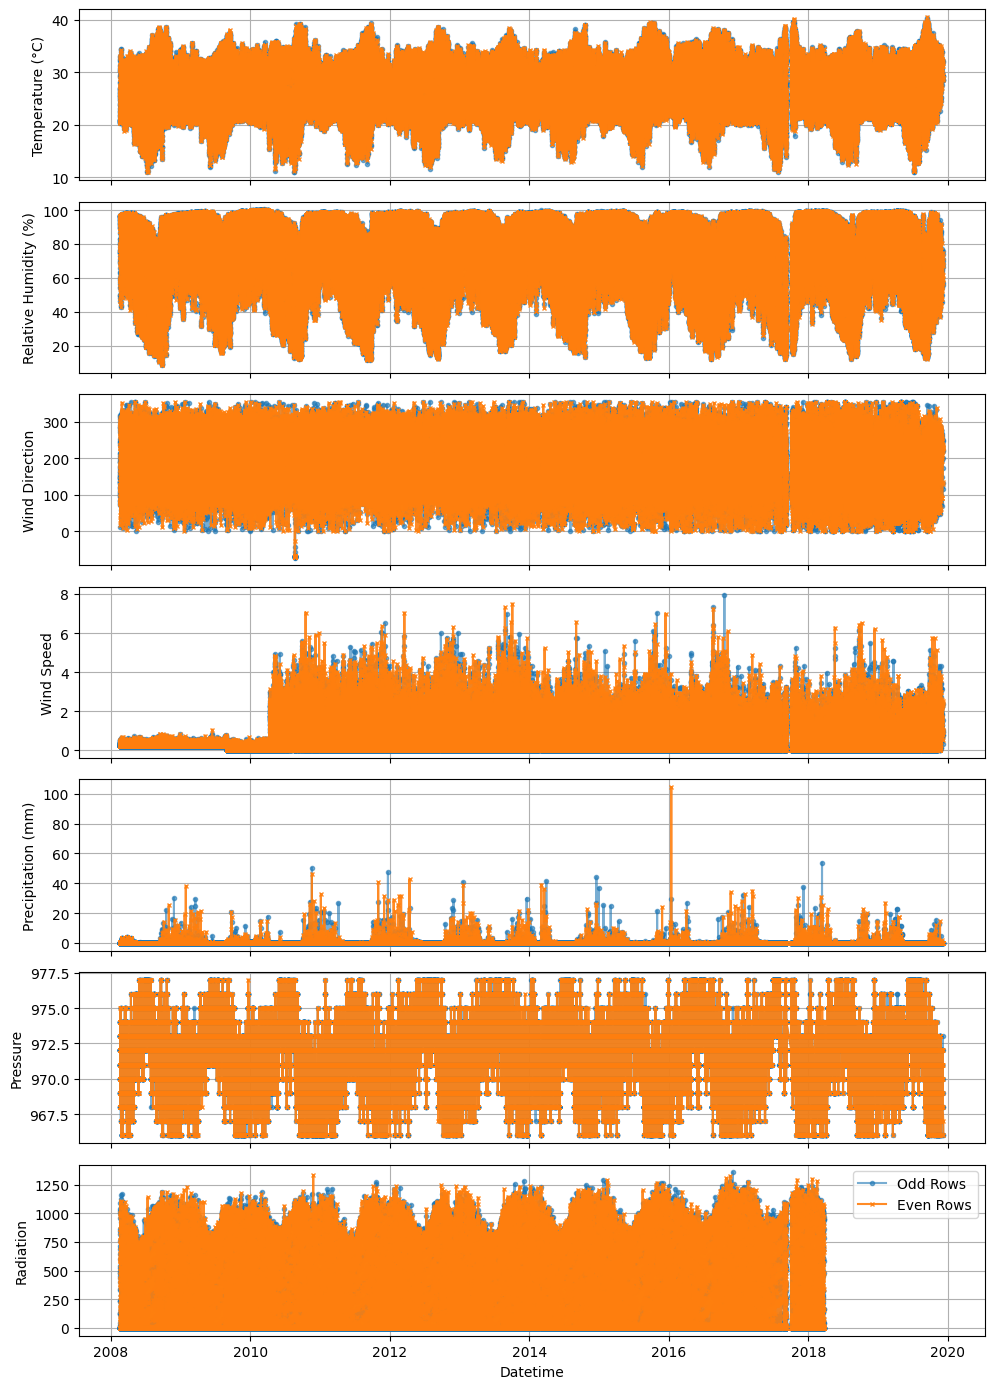

In [23]:
# Clean the data by removing the outliers
# Remove rows where Pressure is zero in both datasets
odd_rows = odd_rows[odd_rows['Pressure'] > 0]
even_rows = even_rows[even_rows['Pressure'] > 0]

# Function to remove outliers using the IQR method
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

# Columns to remove outliers from
outlier_columns = ['Temperature (°C)', 'Wind Direction', 'Pressure']

# Remove outliers from both odd and even row datasets
odd_rows_cleaned = remove_outliers(odd_rows, outlier_columns)
even_rows_cleaned = remove_outliers(even_rows, outlier_columns)

def plot_met_data(odds,evens):
    
    columns_to_plot = ['Temperature (°C)', 'Relative Humidity (%)', 'Wind Direction',
                   'Wind Speed', 'Precipitation (mm)', 'Pressure', 'Radiation']
    # Replot after outlier removal
    fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 14), sharex=True)

    # Plot each variable as a subplot
    for ax, column in zip(axes, columns_to_plot):
        ax.plot(odds.index, odds[column], label=f"Odd Rows", linestyle='-', marker='o', markersize=3,alpha=0.6)
        ax.plot(evens.index, evens[column], label=f"Even Rows", linestyle='-', marker='x', markersize=3, alpha=0.9)
        ax.set_ylabel(column)
        ax.grid(True)

    ax.legend()
    # Set x-axis label
    axes[-1].set_xlabel("Datetime")

    # Adjust layout for better visibility
    plt.tight_layout()

plot_met_data(odd_rows_cleaned,even_rows_cleaned)

print('odd dataframe:')
print(odd_rows_cleaned.isna().sum())
print('even dataframe:')
print(even_rows_cleaned.isna().sum())


In [24]:
odd_rows_cleaned.describe()

Hour  Temperature (°C)  Relative Humidity (%)  Wind Direction  \
count  84920.000000     134356.000000          134356.000000   134357.000000   
mean    1211.727862         25.717496              72.008506      174.107120   
std      694.043151          5.038681              23.327963       74.999328   
min       30.000000         10.950000               8.810000      -72.100000   
25%      600.000000         22.250000              55.080000      112.700000   
50%     1230.000000         24.620000              78.300000      166.500000   
75%     1830.000000         29.790000              93.000000      236.800000   
max     2400.000000         40.930000             107.200000      354.700000   

          Wind Speed  Precipitation (mm)       Pressure     Radiation  
count  134357.000000       134357.000000  134357.000000  84920.000000  
mean        0.670251            0.090425     971.591521    229.272435  
std         0.840251            0.970926       2.304621    324.141851  
min         0.000000            0.000000     966.000000      0.000000  
25%         0.006000            0.000000     970.000000      0.000000  
50%         0.295000            0.000000     972.000000      5.291000  
75%         1.108000            0.000000     973.000000    436.100000  
max         7.970000           78.230000     977.000000   1358.000000

odd dataframe:
Hour                     5024
Temperature (°C)         4409
Relative Humidity (%)    4409
Wind Direction           4409
Wind Speed               4409
Precipitation (mm)       4409
Pressure                 4409
Radiation                5024
dtype: int64
even dataframe:
Hour                     5023
Temperature (°C)         4408
Relative Humidity (%)    4408
Wind Direction           4408
Wind Speed               4408
Precipitation (mm)       4408
Pressure                 4408
Radiation                5023
dtype: int64


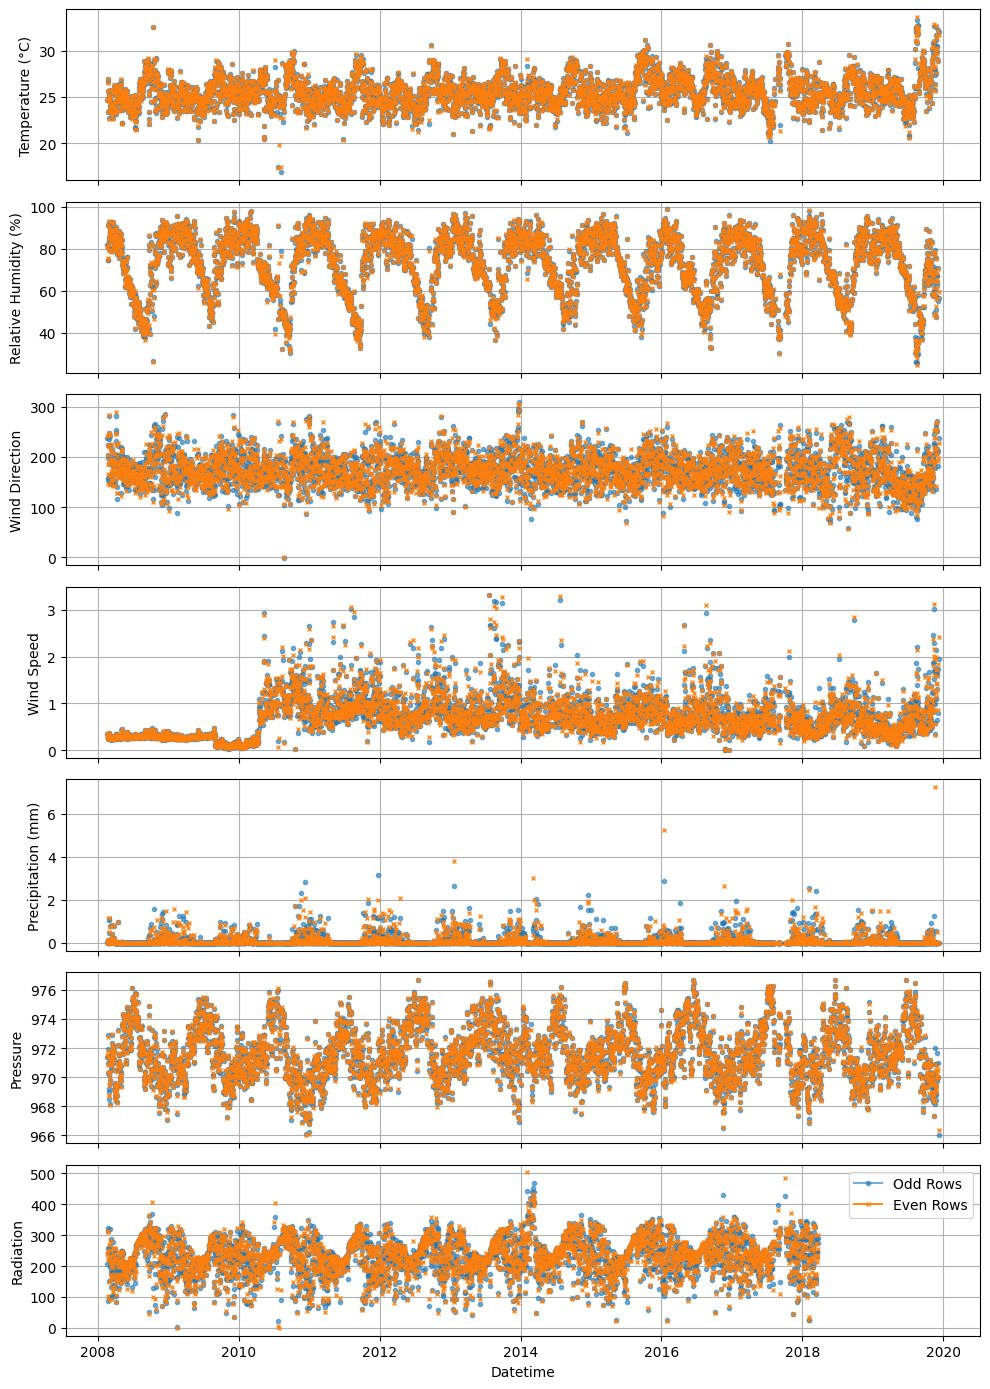

In [25]:
# Resample and average every 12 hours
odd_rows_avg_12h = odd_rows_cleaned.resample('12h').mean()
even_rows_avg_12h = even_rows_cleaned.resample('12h').mean()

plot_met_data(odd_rows_avg_12h,even_rows_avg_12h)

print('odd dataframe:')
print(odd_rows_avg_12h.isna().sum())
print('even dataframe:')
print(even_rows_avg_12h.isna().sum())

odd dataframe:
Hour                     715
Temperature (°C)         100
Relative Humidity (%)    100
Wind Direction           100
Wind Speed               100
Precipitation (mm)       100
Pressure                 100
Radiation                715
dtype: int64
even dataframe:
Hour                     714
Temperature (°C)          99
Relative Humidity (%)     99
Wind Direction            99
Wind Speed                99
Precipitation (mm)        99
Pressure                  99
Radiation                714
dtype: int64


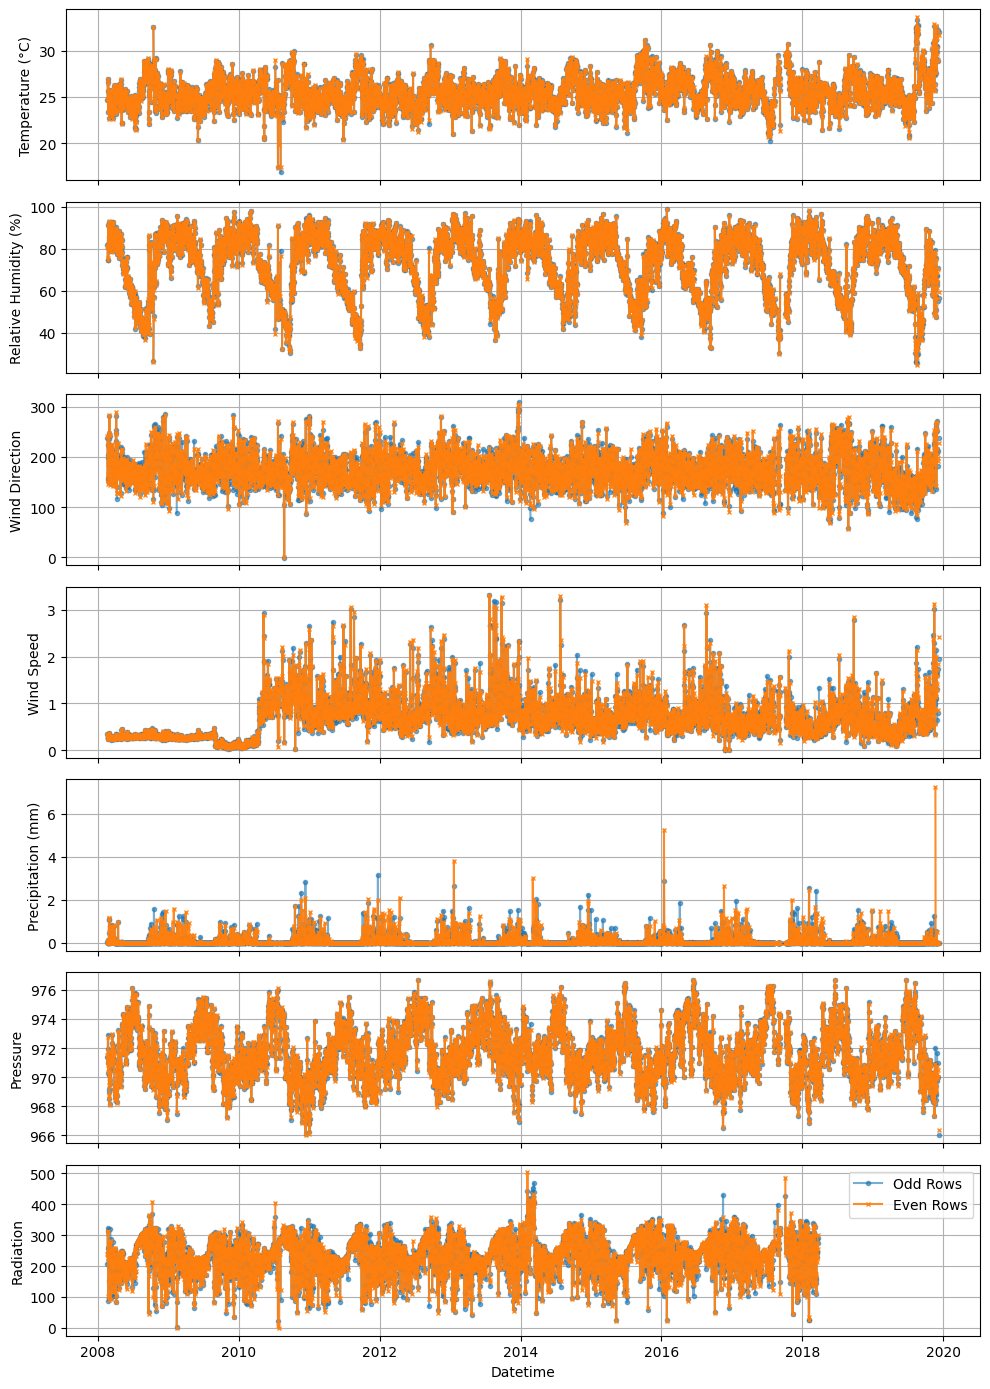

In [121]:
# Resample and average every 12 hours
odd_rows_avg_24h = odd_rows_cleaned.resample('24h').mean()
even_rows_avg_24h = even_rows_cleaned.resample('24h').mean()

plot_met_data(odd_rows_avg_24h,even_rows_avg_24h)

print('odd dataframe:')
print(odd_rows_avg_24h.isna().sum())
print('even dataframe:')
print(even_rows_avg_24h.isna().sum())

odd_rows_avg_24h.to_csv('add_rows_df.csv')

In [28]:
odd_rows_avg_24h

Hour  Temperature (°C)  Relative Humidity (%)  Wind Direction  \
Datetime                                                                      
2008-02-20  1750.0         24.655714              81.507857      237.035714   
2008-02-21  1180.0         24.710417              82.095833      153.153750   
2008-02-22  1250.0         26.601250              74.830833      157.983333   
2008-02-23  1180.0         25.697500              80.696667      203.695833   
2008-02-24  1250.0         26.934167              74.576667      197.033333   
...            ...               ...                    ...             ...   
2019-12-04     NaN         28.911667              70.863333      181.900000   
2019-12-05     NaN               NaN                    NaN             NaN   
2019-12-06     NaN               NaN                    NaN             NaN   
2019-12-07     NaN               NaN                    NaN             NaN   
2019-12-08     NaN         32.040000              56.525000      237.750000   

            Wind Speed  Precipitation (mm)    Pressure   Radiation  
Datetime                                                            
2008-02-20    0.355429            0.036286  971.357143  207.187143  
2008-02-21    0.258667            0.000000  970.958333  258.074583  
2008-02-22    0.258375            0.000000  971.916667  322.494167  
2008-02-23    0.245250            0.000000  972.916667  241.475292  
2008-02-24    0.280333            0.000000  971.416667  314.043750  
...                ...                 ...         ...         ...  
2019-12-04    0.798833            0.000000  970.000000         NaN  
2019-12-05         NaN                 NaN         NaN         NaN  
2019-12-06         NaN                 NaN         NaN         NaN  
2019-12-07         NaN                 NaN         NaN         NaN  
2019-12-08    1.953000            0.000000  966.000000         NaN  

[4310 rows x 8 columns]

In [117]:
odd_rows_avg_24h

Hour  Temperature (°C)  Relative Humidity (%)  Wind Direction  \
Datetime                                                                      
2008-02-20  1750.0         24.655714              81.507857      237.035714   
2008-02-21  1180.0         24.710417              82.095833      153.153750   
2008-02-22  1250.0         26.601250              74.830833      157.983333   
2008-02-23  1180.0         25.697500              80.696667      203.695833   
2008-02-24  1250.0         26.934167              74.576667      197.033333   
...            ...               ...                    ...             ...   
2019-12-04     NaN         28.911667              70.863333      181.900000   
2019-12-05     NaN               NaN                    NaN             NaN   
2019-12-06     NaN               NaN                    NaN             NaN   
2019-12-07     NaN               NaN                    NaN             NaN   
2019-12-08     NaN         32.040000              56.525000      237.750000   

            Wind Speed  Precipitation (mm)    Pressure   Radiation  \
Datetime                                                             
2008-02-20    0.355429            0.036286  971.357143  207.187143   
2008-02-21    0.258667            0.000000  970.958333  258.074583   
2008-02-22    0.258375            0.000000  971.916667  322.494167   
2008-02-23    0.245250            0.000000  972.916667  241.475292   
2008-02-24    0.280333            0.000000  971.416667  314.043750   
...                ...                 ...         ...         ...   
2019-12-04    0.798833            0.000000  970.000000         NaN   
2019-12-05         NaN                 NaN         NaN         NaN   
2019-12-06         NaN                 NaN         NaN         NaN   
2019-12-07         NaN                 NaN         NaN         NaN   
2019-12-08    1.953000            0.000000  966.000000         NaN   

            Temperature_K  Vapor_Pressure  Specific_Humidity  
Datetime                                                      
2008-02-20     297.805714       25.291300           0.016356  
2008-02-21     297.860417       25.557244           0.016537  
2008-02-22     299.751250       26.064267           0.016851  
2008-02-23     298.847500       26.643713           0.017212  
2008-02-24     300.084167       26.490157           0.017138  
...                   ...             ...                ...  
2019-12-04     302.061667       28.252843           0.018318  
2019-12-05            NaN             NaN                NaN  
2019-12-06            NaN             NaN                NaN  
2019-12-07            NaN             NaN                NaN  
2019-12-08     305.190000       26.962523           0.017546  

[4310 rows x 11 columns]

In [122]:
def convert_humidity(df):
    # Define constants for the conversion
    A = 6.112  # hPa
    B = 17.67
    C = 243.5
    epsilon = 0.622  # Ratio of molecular weight of water vapor to dry air

    # Convert Temperature from Celsius to Kelvin
    df['Temperature_K'] = df['Temperature (°C)'] + 273.15

    # Compute Vapor Pressure (e) in hPa
    df['Vapor_Pressure'] = (
        df['Relative Humidity (%)'] *
        (A * np.exp((B * df['Temperature (°C)']) / (df['Temperature (°C)'] + C))) / 100
    )

    # Compute Specific Humidity (kg/kg)
    df['Specific_Humidity'] = (
        (epsilon * df['Vapor_Pressure']) /
        (df['Pressure'] - (0.378 * df['Vapor_Pressure']))
    )

    return df

odd_rows_avg_24h=convert_humidity(odd_rows_avg_24h)
even_rows_avg_24h=convert_humidity(even_rows_avg_24h)


#calcualte longwave radiation
def calc_longwave_rad(df):
    # Constants for the Stefan-Boltzmann equation
    emissivity = 0.98  # Typical for natural surfaces
    stefan_boltzmann_constant = 5.67e-8  # W/m²K⁴

    # Convert Temperature from Celsius to Kelvin
    df['Temperature (°K)'] = df['Temperature (°C)'] + 273.15

    # Calculate Longwave Radiation (LW)
    df['Longwave_Radiation'] = (
        emissivity * stefan_boltzmann_constant * (df['Temperature (°K)'] ** 4)
    )
    return df

odd_rows_avg_24h=calc_longwave_rad(odd_rows_avg_24h)
even_rows_avg_24h=calc_longwave_rad(even_rows_avg_24h)

#calculate v and u wind speed in (m/s)
def calc_U_V_speed(df):
    # Convert wind direction from degrees to radians
    df['Wind_Direction_Rad'] = np.radians(df['Wind Direction'])

    # Calculate U and V components of wind speed
    df['Uspeed'] = -df['Wind Speed'] * np.sin(df['Wind_Direction_Rad'])
    df['Vspeed'] = -df['Wind Speed'] * np.cos(df['Wind_Direction_Rad'])

    return df

odd_rows_avg_24h=calc_U_V_speed(odd_rows_avg_24h)
even_rows_avg_24h=calc_U_V_speed(even_rows_avg_24h)

#convert pressure to Pa 
odd_rows_avg_24h['Pressure']=odd_rows_avg_24h['Pressure']*100
even_rows_avg_24h['Pressure']=even_rows_avg_24h['Pressure']*100

#convert precip (mm) to to (m/s) (86400 sec in a day)
odd_rows_avg_24h['Precipitation (m/s)']= odd_rows_avg_24h['Precipitation (mm)']/86400
even_rows_avg_24h['Precipitation (m/s)']=even_rows_avg_24h['Precipitation (mm)']/86400


# Convert met data to LAKE input compatable
def convert_data_LAKE_input_compatable(df):
    
    # Check if Datetime is set as the index
    if df.index.name == 'Datetime':
        # Reset index to make Datetime a column
        df = df.reset_index()

    # Convert Datetime to separate Year, Month, and Day columns
    df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
    df['Year'] = df['Datetime'].dt.year
    df['Month'] = df['Datetime'].dt.month
    df['Day'] = df['Datetime'].dt.day

    # Rename and select columns in the specified order
    df_renamed = df.rename(columns={
        'Uspeed': 'Uspeed',
        'Vspeed': 'Vspeed',
        'Temperature (°K)': 'Temp',
        'Specific_Humidity': 'Hum',
        'Pressure': 'Pres',
        'Radiation': 'SWdown',
        'Longwave_Radiation': 'LWdown',
        'Precipitation (m/s)': 'Precip'
    })[['Year', 'Month', 'Day', 'Uspeed', 'Vspeed', 'Temp', 'Hum', 'Pres', 'SWdown', 'LWdown', 'Precip']]
    return df_renamed

odd_rows_avg_24h_LAKE=convert_data_LAKE_input_compatable(odd_rows_avg_24h)
even_rows_avg_24h_LAKE=convert_data_LAKE_input_compatable(even_rows_avg_24h)
even_rows_avg_24h_LAKE.to_csv('odd_rows_avg_24h_LAKE.csv')
even_rows_avg_24h_LAKE.to_csv('even_rows_avg_24h_LAKE.csv')

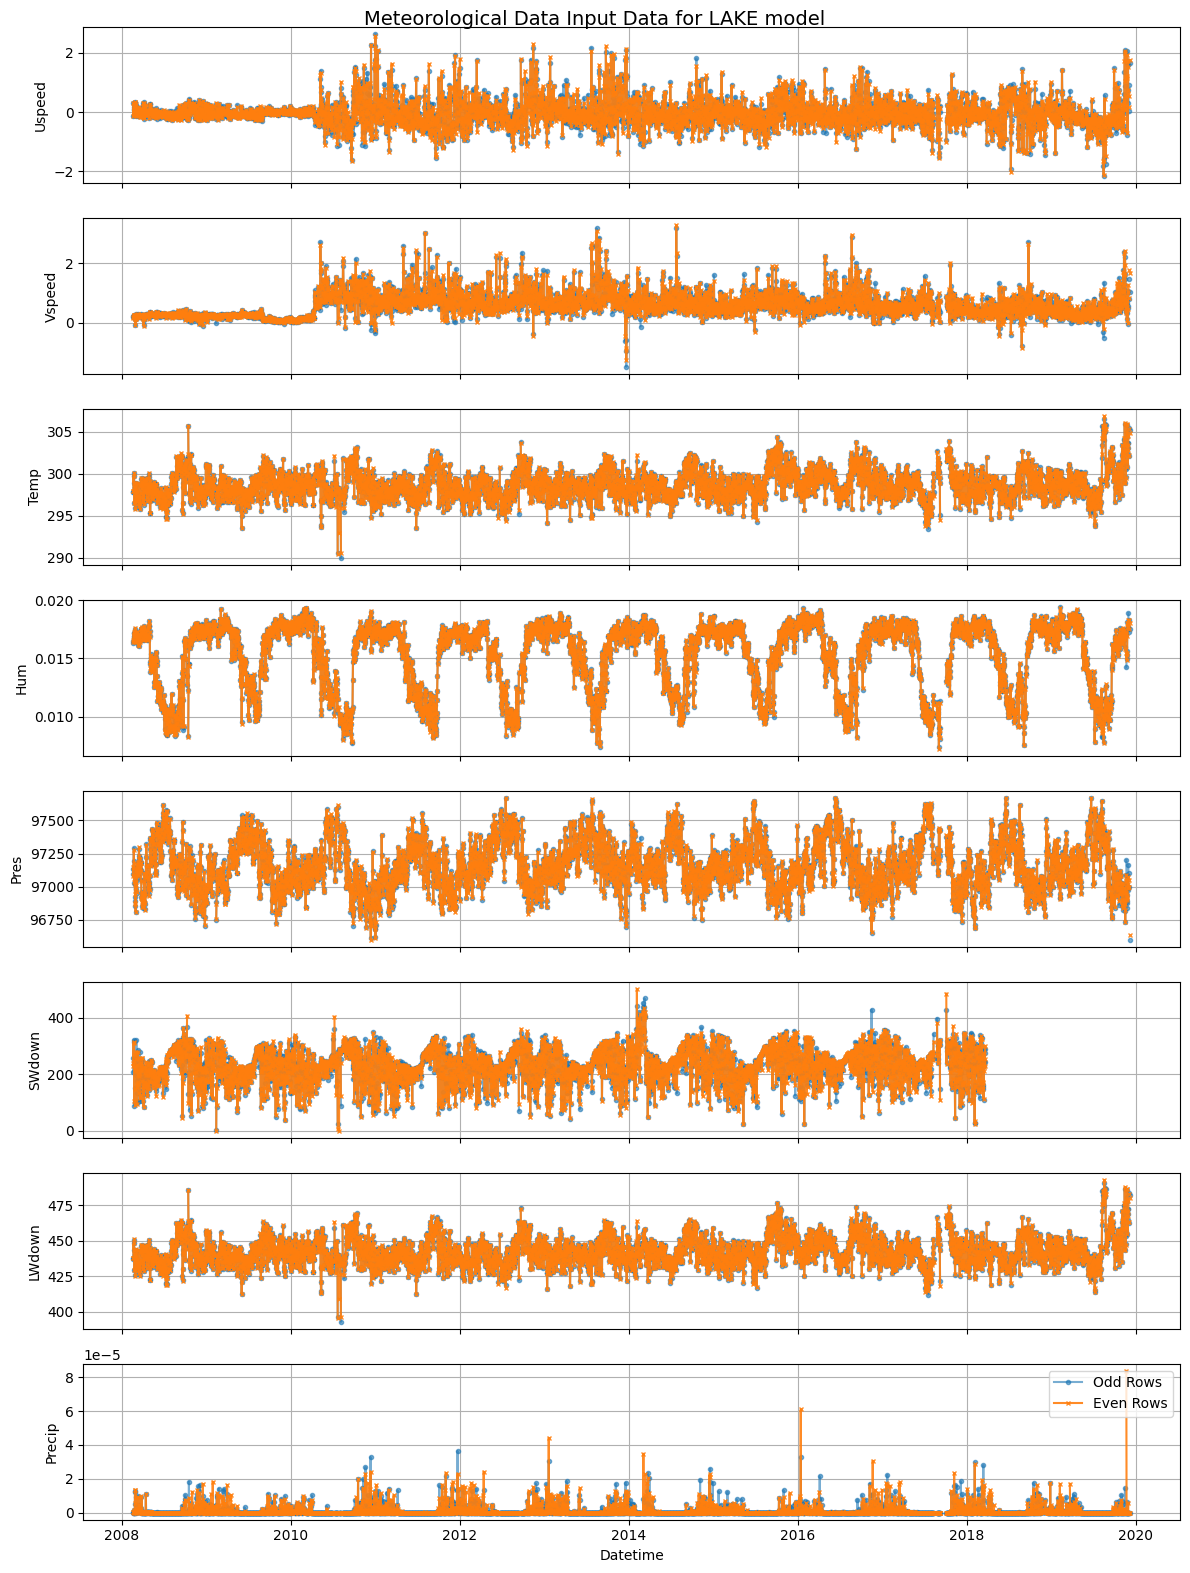

In [123]:
#,even_rows_avg_24h_LAKE)

def plot_met_dat_LAKE(odds,evens):
    # Define the columns to plot
    columns_to_plot = ['Uspeed', 'Vspeed', 'Temp', 'Hum', 'Pres', 'SWdown', 'LWdown', 'Precip']

    # Create a datetime column for plotting
    odds['Datetime'] = pd.to_datetime(odds[['Year', 'Month', 'Day']])
    evens['Datetime'] = pd.to_datetime(evens[['Year', 'Month', 'Day']])

    # Create subplots
    fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(12, 16), sharex=True)

    # Plot each variable
    for i, column in enumerate(columns_to_plot):
        axes[i].plot(odds['Datetime'], odds[column], label=f"Odd Rows", linestyle='-', marker='o', markersize=3,alpha=0.6)
        axes[i].plot(evens['Datetime'], evens[column], label=f"Even Rows", linestyle='-', marker='x', markersize=3, alpha=0.9)
        axes[i].set_ylabel(column)
        axes[i].grid(True)
       
    axes[-1].legend(loc='upper right')

    # Set common labels
    axes[-1].set_xlabel("Datetime")
    fig.suptitle("Meteorological Data Input Data for LAKE model", fontsize=14)

    # Improve layout
    plt.tight_layout()

plot_met_dat_LAKE(odd_rows_avg_24h_LAKE,even_rows_avg_24h_LAKE)

In [95]:

file_path = "Tanguro_LAKE_Tanguro_transient.dat" #ERA
met_data_TL = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)
met_data_TL.head()

Year  Month  Day    Uspeed    Vspeed        Temp       Hum          Pres  \
0  2019      1    1 -0.229542 -0.280020  297.174211  0.018108  97280.698619   
1  2019      1    2 -0.525300  0.157582  298.937422  0.018534  97332.298049   
2  2019      1    3 -0.203469 -0.621346  300.154941  0.019062  97189.056238   
3  2019      1    4  0.026678 -0.262133  299.707519  0.018787  97232.430827   
4  2019      1    5  0.199548  0.422542  298.459321  0.018946  97289.617564   

       SWdown      LWdown        Precip  
0  152.419903  408.180447  7.865400e-08  
1  291.743777  409.887077  4.421840e-08  
2  288.581452  411.535394  2.680962e-08  
3  276.660249  411.914060  9.051289e-08  
4  241.842295  414.532421  9.709190e-08

In [129]:
odd_rows_avg_24h_LAKE.tail(10)

Year  Month  Day    Uspeed    Vspeed        Temp       Hum  \
4300  2019     11   29  0.759594  1.076224  303.638571  0.017713   
4301  2019     11   30  0.302512  0.557932  303.606667  0.018869   
4302  2019     12    1       NaN       NaN         NaN       NaN   
4303  2019     12    2  0.907498  1.470129  305.425000  0.017270   
4304  2019     12    3       NaN       NaN         NaN       NaN   
4305  2019     12    4  0.026485  0.798394  302.061667  0.018318   
4306  2019     12    5       NaN       NaN         NaN       NaN   
4307  2019     12    6       NaN       NaN         NaN       NaN   
4308  2019     12    7       NaN       NaN         NaN       NaN   
4309  2019     12    8  1.651706  1.042149  305.190000  0.017546   

              Pres  SWdown      LWdown  Precip   Datetime  
4300  96971.428571     NaN  472.320605     0.0 2019-11-29  
4301  97166.666667     NaN  472.122121     0.0 2019-11-30  
4302           NaN     NaN         NaN     NaN 2019-12-01  
4303  97100.000000     NaN  483.534498     0.0 2019-12-02  
4304           NaN     NaN         NaN     NaN 2019-12-03  
4305  97000.000000     NaN  462.585049     0.0 2019-12-04  
4306           NaN     NaN         NaN     NaN 2019-12-05  
4307           NaN     NaN         NaN     NaN 2019-12-06  
4308           NaN     NaN         NaN     NaN 2019-12-07  
4309  96600.000000     NaN  482.048051     0.0 2019-12-08

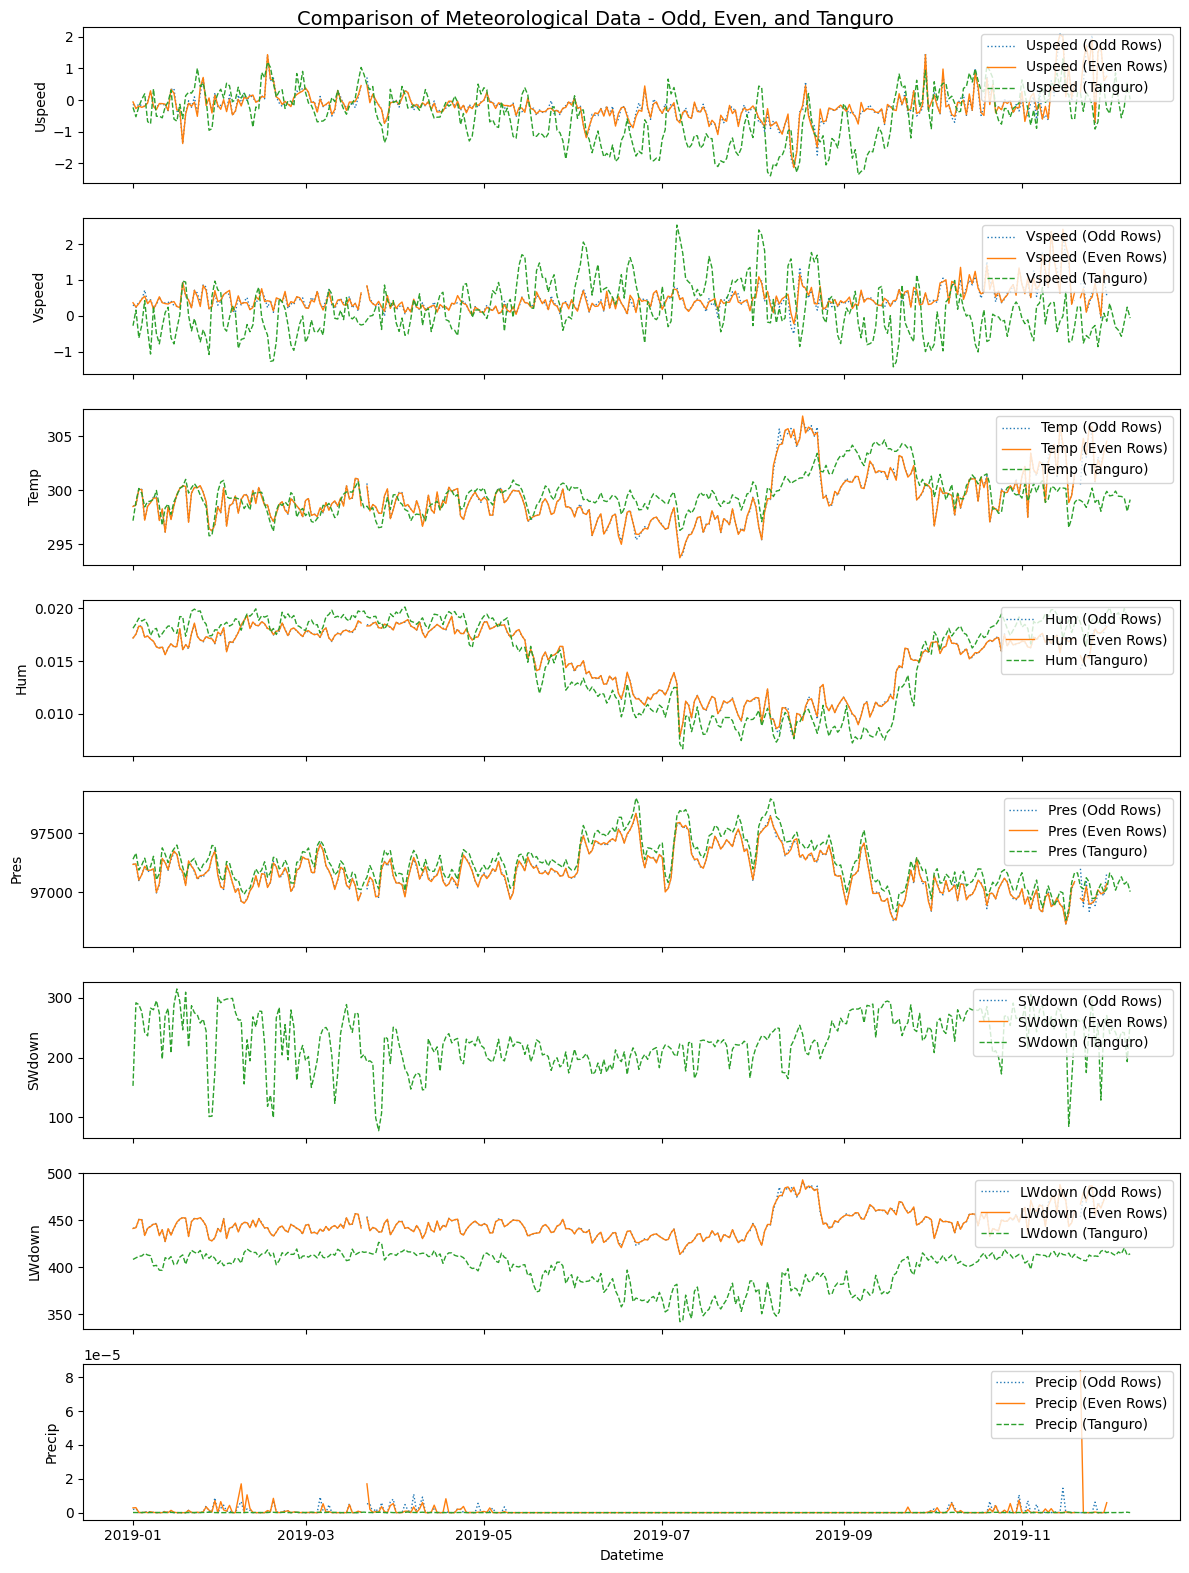

In [124]:
def show_overlap(odd_met_data,even_met_data,tanguro_data):
    # Convert to datetime for merging
    odd_met_data['Datetime'] = pd.to_datetime(odd_met_data[['Year', 'Month', 'Day']])
    even_met_data['Datetime'] = pd.to_datetime(even_met_data[['Year', 'Month', 'Day']])
    tanguro_data['Datetime'] = pd.to_datetime(tanguro_data[['Year', 'Month', 'Day']])

    # Merge all datasets on Year, Month, and Day
    merged_data = pd.merge(odd_met_data, even_met_data, on=['Year', 'Month', 'Day'], suffixes=('_odd', '_even'))
    merged_data = pd.merge(merged_data, tanguro_data, on=['Year', 'Month', 'Day'], suffixes=('', '_tanguro'))

    # Define variables for plotting
    variables = ['Uspeed', 'Vspeed', 'Temp', 'Hum', 'Pres', 'SWdown', 'LWdown', 'Precip']

    # Create subplots for overlaying the three datasets
    fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(12, 16), sharex=True)

    for i, var in enumerate(variables):
        axes[i].plot(merged_data['Datetime'], merged_data[f'{var}_odd'], label=f'{var} (Odd Rows)', linewidth=1, linestyle='dotted')
        axes[i].plot(merged_data['Datetime'], merged_data[f'{var}_even'], label=f'{var} (Even Rows)', linewidth=1)
        axes[i].plot(merged_data['Datetime'], merged_data[f'{var}'], label=f'{var} (Tanguro)', linewidth=1, linestyle='dashed')
        axes[i].set_ylabel(var)
        axes[i].legend(loc='upper right')

    axes[-1].set_xlabel("Datetime")
    fig.suptitle("Comparison of Meteorological Data - Odd, Even, and Tanguro", fontsize=14)
    plt.tight_layout()

show_overlap(odd_rows_avg_24h_LAKE,even_rows_avg_24h_LAKE,met_data_TL)

In [126]:
odd_rows_avg_24h_LAKE

Year  Month  Day    Uspeed    Vspeed        Temp       Hum  \
0     2008      2   20  0.298208  0.193394  297.805714  0.016356   
1     2008      2   21 -0.116813  0.230788  297.860417  0.016537   
2     2008      2   22 -0.096859  0.239533  299.751250  0.016851   
3     2008      2   23  0.098561  0.224573  298.847500  0.017212   
4     2008      2   24  0.082117  0.268036  300.084167  0.017138   
...    ...    ...  ...       ...       ...         ...       ...   
4305  2019     12    4  0.026485  0.798394  302.061667  0.018318   
4306  2019     12    5       NaN       NaN         NaN       NaN   
4307  2019     12    6       NaN       NaN         NaN       NaN   
4308  2019     12    7       NaN       NaN         NaN       NaN   
4309  2019     12    8  1.651706  1.042149  305.190000  0.017546   

              Pres      SWdown      LWdown        Precip   Datetime  
0     97135.714286  207.187143  437.060181  4.199735e-07 2008-02-20  
1     97095.833333  258.074583  437.381395  0.000000e+00 2008-02-21  
2     97191.666667  322.494167  448.593675  0.000000e+00 2008-02-22  
3     97291.666667  241.475292  443.208053  0.000000e+00 2008-02-23  
4     97141.666667  314.043750  450.589908  0.000000e+00 2008-02-24  
...            ...         ...         ...           ...        ...  
4305  97000.000000         NaN  462.585049  0.000000e+00 2019-12-04  
4306           NaN         NaN         NaN           NaN 2019-12-05  
4307           NaN         NaN         NaN           NaN 2019-12-06  
4308           NaN         NaN         NaN           NaN 2019-12-07  
4309  96600.000000         NaN  482.048051  0.000000e+00 2019-12-08  

[4310 rows x 12 columns]

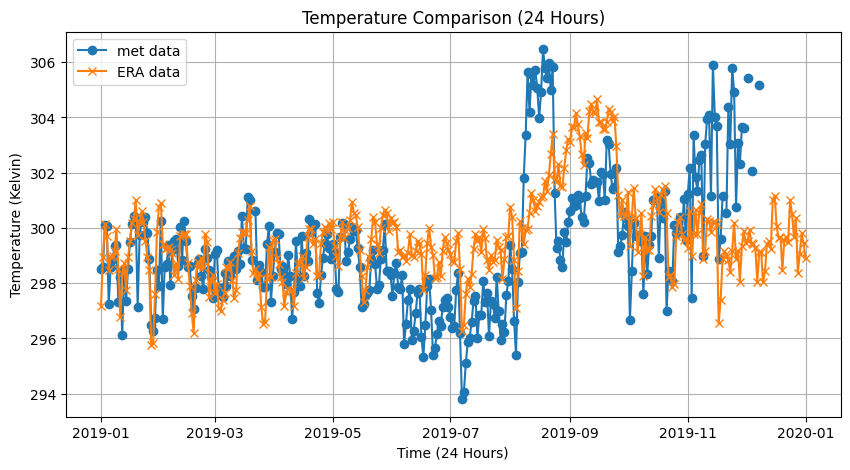

In [ ]:
#compare ERA an met data
time_b='2019-01-01'
time_e='2020-01-01'
plt.figure(figsize=(10, 5))

plt.plot(odd_rows_avg_24h['Temperature (°C)'][time_b:time_e], label="met data", marker='o', linestyle='-')
plt.plot(met_data_TL['Temp'][time_b:time_e], label="ERA data", marker='x', linestyle='-')

# Labels and legend
plt.xlabel("Time (24 Hours)")
plt.ylabel("Temperature (Kelvin)")
plt.title("Temperature Comparison (24 Hours)")
plt.legend()
plt.grid(True)

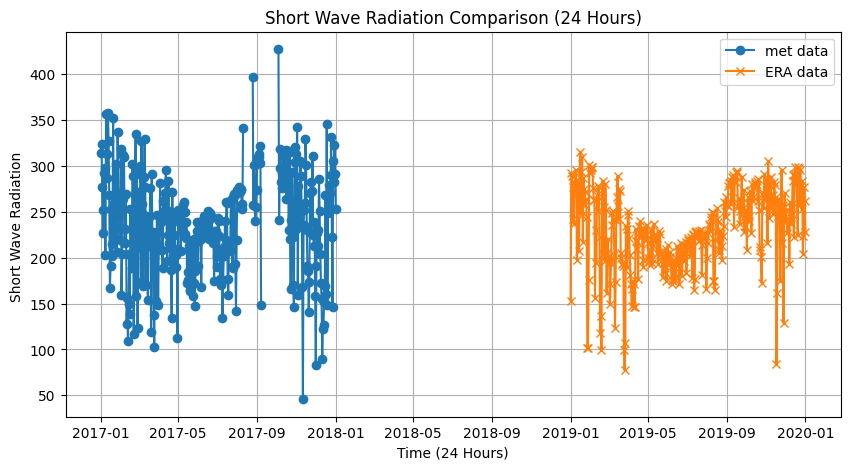

In [62]:
#compare ERA an met data
time_b='2019-01-01'
time_e='2020-01-01'
plt.figure(figsize=(10, 5))
plt.plot(odd_rows_avg_24h['Radiation']['2017-01-01':'2018-01-01'], label="met data", marker='o', linestyle='-')
plt.plot(met_data_TL['SWdown'][time_b:time_e], label="ERA data", marker='x', linestyle='-')

# Labels and legend
plt.xlabel("Time (24 Hours)")
plt.ylabel("Short Wave Radiation (W/m**2) ")
plt.title("Short Wave Radiation Comparison (24 Hours)")
plt.legend()
plt.grid(True)

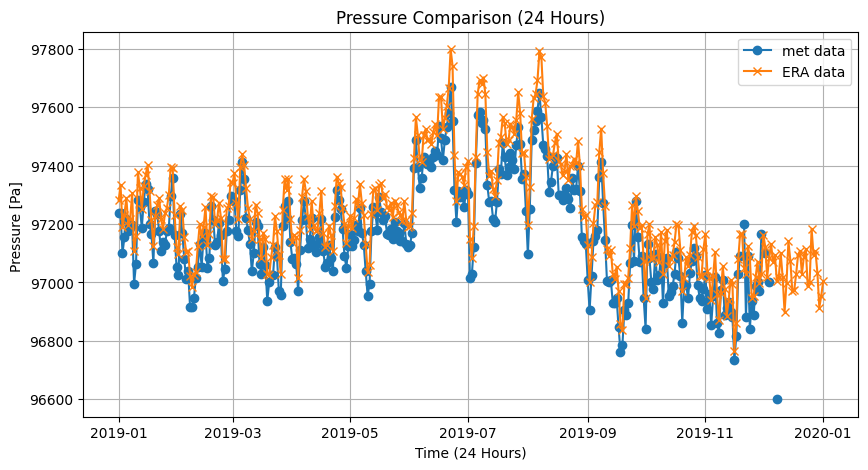

In [68]:
#compare ERA an met data
time_b='2019-01-01'
time_e='2020-01-01'
plt.figure(figsize=(10, 5))
#dd_rows_avg_24h['Pressure'] = odd_rows_avg_24h['Pressure']*100 
plt.plot(odd_rows_avg_24h['Pressure'][time_b:time_e]*100, label="met data", marker='o', linestyle='-')
plt.plot(met_data_TL['Pres'][time_b:time_e], label="ERA data", marker='x', linestyle='-')

# Labels and legend
plt.xlabel("Time (24 Hours)")
plt.ylabel("Pressure [Pa] ")
plt.title("Pressure Comparison (24 Hours)")
plt.legend()
plt.grid(True)

In [64]:
odd_rows_avg_24h['Pressure']

Datetime
2008-02-20    971.357143
2008-02-21    970.958333
2008-02-22    971.916667
2008-02-23    972.916667
2008-02-24    971.416667
                 ...    
2019-12-04    970.000000
2019-12-05           NaN
2019-12-06           NaN
2019-12-07           NaN
2019-12-08    966.000000
Name: Pressure, Length: 4310, dtype: float64

Assigments:
1. Check and unit correct for other variables
2. odd_rows_avg_24h does not have longtwave radiation (ask chatgpt how to calculate longtwave radiation using shortwave and humidity)
3. Can we gap filled odd_rows_avg_24h or even_rows_avg_24h (if yes, explain how)
4. Compare other four Tangoru ERA dataset, how close they are with met_data_TL
